# Taller 2: operaciones de transformación del histograma

## El objetivo de este ejercicio es poner en cero (NEGRO) las regiones que no pertenecen a las bujías (FONDO DE LA IMAGEN), mejorando al mismo tiempo el contraste de los objetos mismos (INTERIOR DE LAS BUJÍAS). Se puede utilizar CUALQUIERA de las operaciones vistas hasta el momento (operaciones aritméticas, lógicas, transformaciones del histograma, umbralización).

Cargamos la imagen.

In [1]:
PATH = './imagenes/'

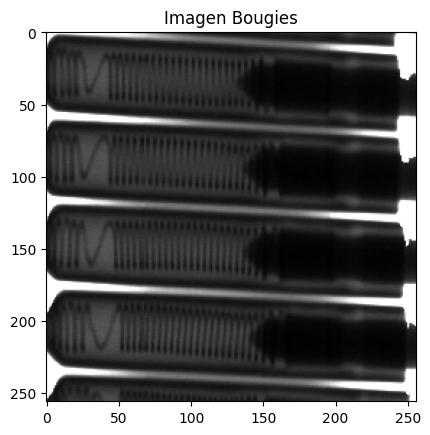

In [2]:
import cv2
import matplotlib.pyplot as plt

imagen_BOUGIES = cv2.imread(PATH + 'BOUGIES.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen_BOUGIES, cmap='gray')
plt.title('Imagen Bougies')
plt.show()

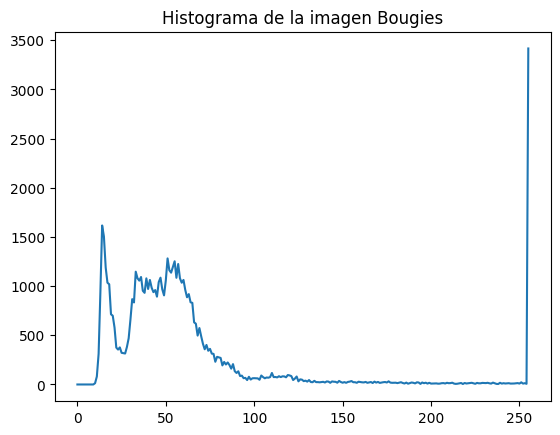

In [3]:
hist = cv2.calcHist([imagen_BOUGIES], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Histograma de la imagen Bougies')
plt.show()

Para resolver el reto, vamos a seguir los siguientes pasos:

1. Aplicamos ecualización para mejorar el contraste de la imagen y distribuir las intensidades en el rango de valores posibles.

2. Crear máscara binaria invertida luego de la umbralización. Esto nos permite separar el fondo de los objetos de la imagen y al ser invertida, los valores del fondo que era blancos pasan a ser negro. Utilizamos un threshold de 225, al cual llegamos probando diferentes valores.

3. Aplicamos operación bitwise AND para combinar fondo negro con imagen ecualizada.

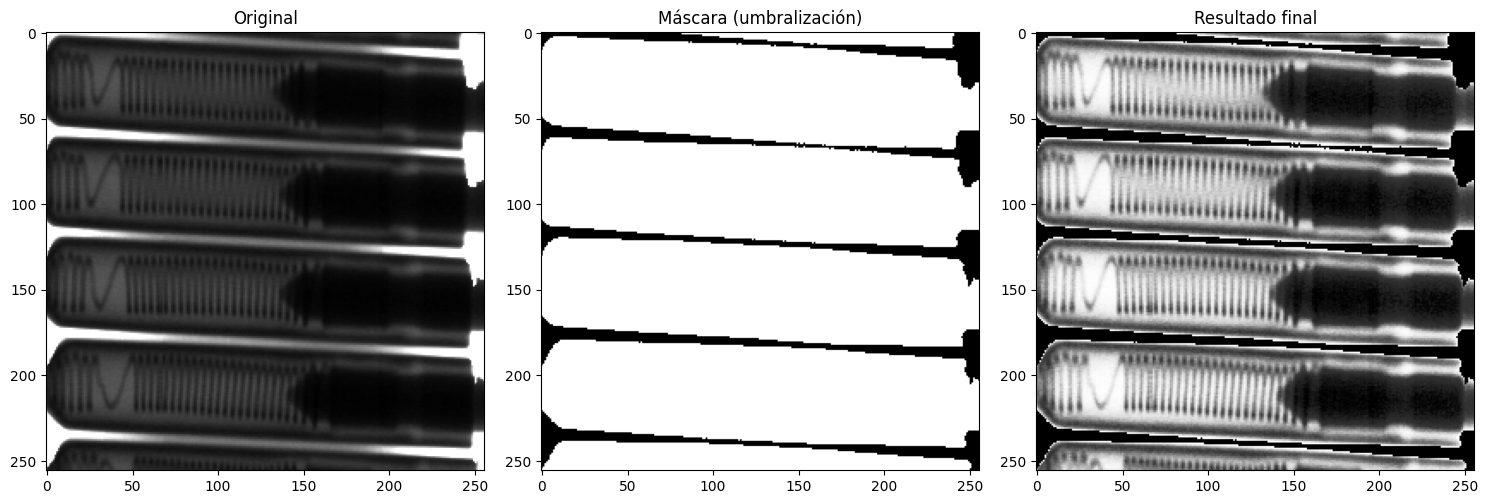

In [7]:
import numpy as np

imagen_equ = cv2.equalizeHist(imagen_BOUGIES)

S=225
thres_value, umbral_image = cv2.threshold(imagen_equ, S, 255, cv2.THRESH_BINARY_INV)

resultado = cv2.bitwise_and(imagen_equ, umbral_image)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(imagen_BOUGIES, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(umbral_image, cmap='gray')
axs[1].set_title('Máscara (umbralización)')
axs[2].imshow(resultado, cmap='gray')
axs[2].set_title('Resultado final')
plt.tight_layout()
plt.show()

El resultado final es semejante a los esperado en el reto.

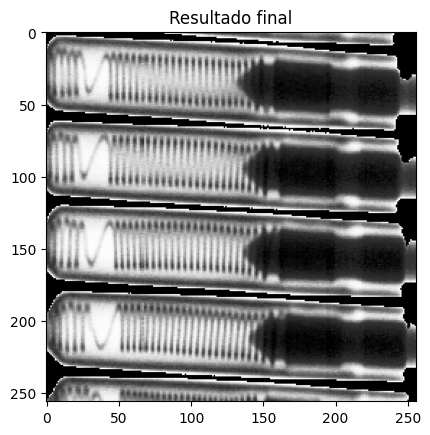

In [9]:
plt.imshow(resultado, cmap='gray')
plt.title('Resultado final')
plt.show()

![Imagen reto](imagenes/imagen_reto.PNG)